In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
#читаем .csv файл
df = pd.read_csv('Dannye_o_kreditnoy_istorii_klientov.csv')

In [3]:
#с помощью .sample получаем рандомный набор строк из датасета, смотрим, что в нем лежит
#замечаем странные значения в следующих столбцах: checking_status, savings_status, other_parties, other_payment_plans, own_telephone
#далее изучим, насколько хранящаяся в них информация полезна для нас
df.sample(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
844,no checking,18.0,existing paid,furniture/equipment,3422.0,<100,>=7,4.0,male single,none,...,life insurance,47.0,bank,own,3.0,skilled,2.0,yes,yes,good
158,0<=X<200,24.0,existing paid,new car,3512.0,100<=X<500,4<=X<7,2.0,male single,none,...,car,38.0,bank,own,2.0,skilled,1.0,yes,yes,good
142,<0,27.0,existing paid,radio/tv,3416.0,<100,1<=X<4,3.0,male single,none,...,car,27.0,none,own,1.0,high qualif/self emp/mgmt,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
371,no checking,18.0,critical/other existing credit,radio/tv,6070.0,<100,>=7,3.0,male single,none,...,car,33.0,none,own,2.0,skilled,1.0,yes,yes,good
307,<0,12.0,existing paid,radio/tv,727.0,100<=X<500,<1,4.0,male mar/wid,none,...,no known property,33.0,none,own,1.0,unskilled resident,1.0,yes,yes,bad
981,no checking,48.0,existing paid,business,4844.0,<100,unemployed,3.0,male single,none,...,car,33.0,bank,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes,bad
644,<0,18.0,critical/other existing credit,radio/tv,1880.0,<100,4<=X<7,4.0,male mar/wid,none,...,life insurance,32.0,none,own,2.0,high qualif/self emp/mgmt,1.0,yes,yes,good
661,<0,12.0,existing paid,new car,900.0,no known savings,1<=X<4,4.0,male mar/wid,none,...,car,23.0,none,own,1.0,skilled,1.0,none,yes,bad
296,no checking,12.0,existing paid,used car,4675.0,no known savings,<1,1.0,female div/dep/mar,none,...,car,20.0,none,rent,1.0,skilled,1.0,none,yes,good


<Axes: >

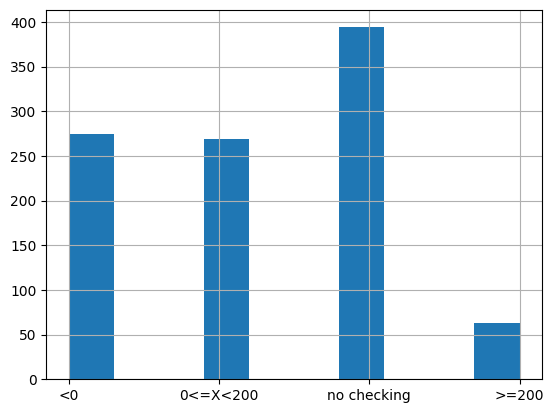

In [4]:
#в данном случае нас интересует значение no checking, оно имеет смысловую нагрузку и не несет в себе смысл NULL, поэтому его не изменяем
df.checking_status.hist()

<Axes: >

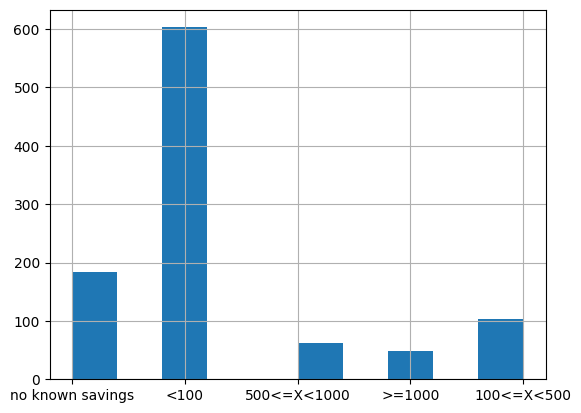

In [6]:
#здесь видим, что есть много значений no known savings, которые не несут в себе значения, скорее всего эти поля несут в себе смысл NULL
df.savings_status.hist()

<Axes: >

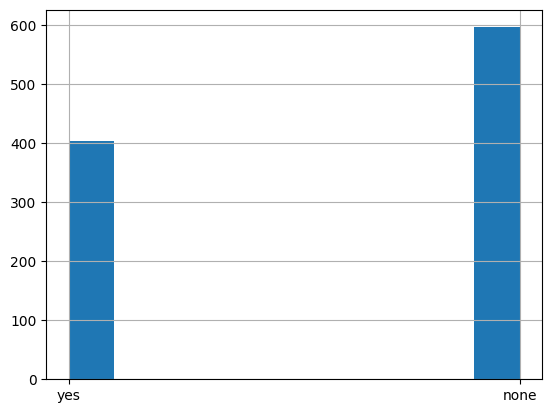

In [9]:
#здесь много значений null, но сравнительно много и полезных значений
df.own_telephone.hist()

<Axes: >

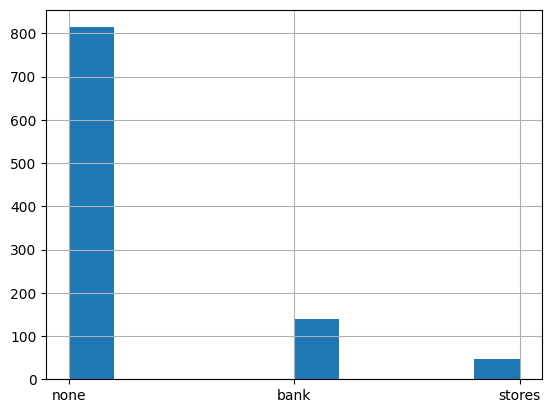

In [8]:
#здесь наша гипотеза подтвердилась, большая часть заполнена none(мусорные NULL значения)
df.other_payment_plans.hist()

<Axes: >

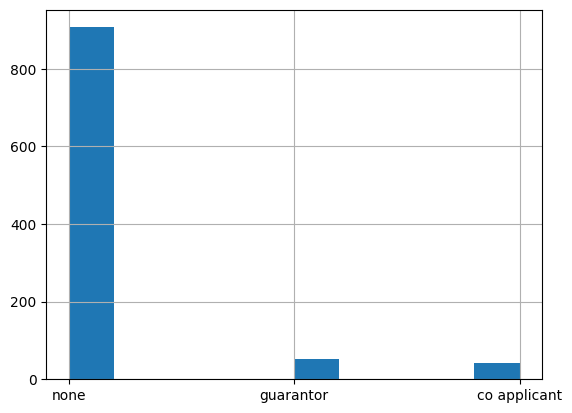

In [7]:
#здесь наша гипотеза подтвердилась, большая часть заполнена none(мусорные NULL значения)
df.other_parties.hist()

In [8]:
#посмотрим уникальные значения для каждого столбца, у которого мало уникальных значений, чтобы исключить пропуски в других данных
for clmn in df:
    if df[clmn].nunique() < 10:
        display(f"{clmn}: {df[clmn].unique()}")

"checking_status: ['<0' '0<=X<200' 'no checking' '>=200']"

"credit_history: ['critical/other existing credit' 'existing paid' 'delayed previously'\n 'no credits/all paid' 'all paid']"

"savings_status: ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']"

"employment: ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']"

'installment_commitment: [4. 2. 3. 1.]'

"personal_status: ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']"

"other_parties: ['none' 'guarantor' 'co applicant']"

'residence_since: [4. 2. 3. 1.]'

"property_magnitude: ['real estate' 'life insurance' 'no known property' 'car']"

"other_payment_plans: ['none' 'bank' 'stores']"

"housing: ['own' 'for free' 'rent']"

'existing_credits: [2. 1. 3. 4.]'

"job: ['skilled' 'unskilled resident' 'high qualif/self emp/mgmt'\n 'unemp/unskilled non res']"

'num_dependents: [1. 2.]'

"own_telephone: ['yes' 'none']"

"foreign_worker: ['yes' 'no']"

"class: ['good' 'bad']"

interval columns not set, guessing: ['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker', 'class']


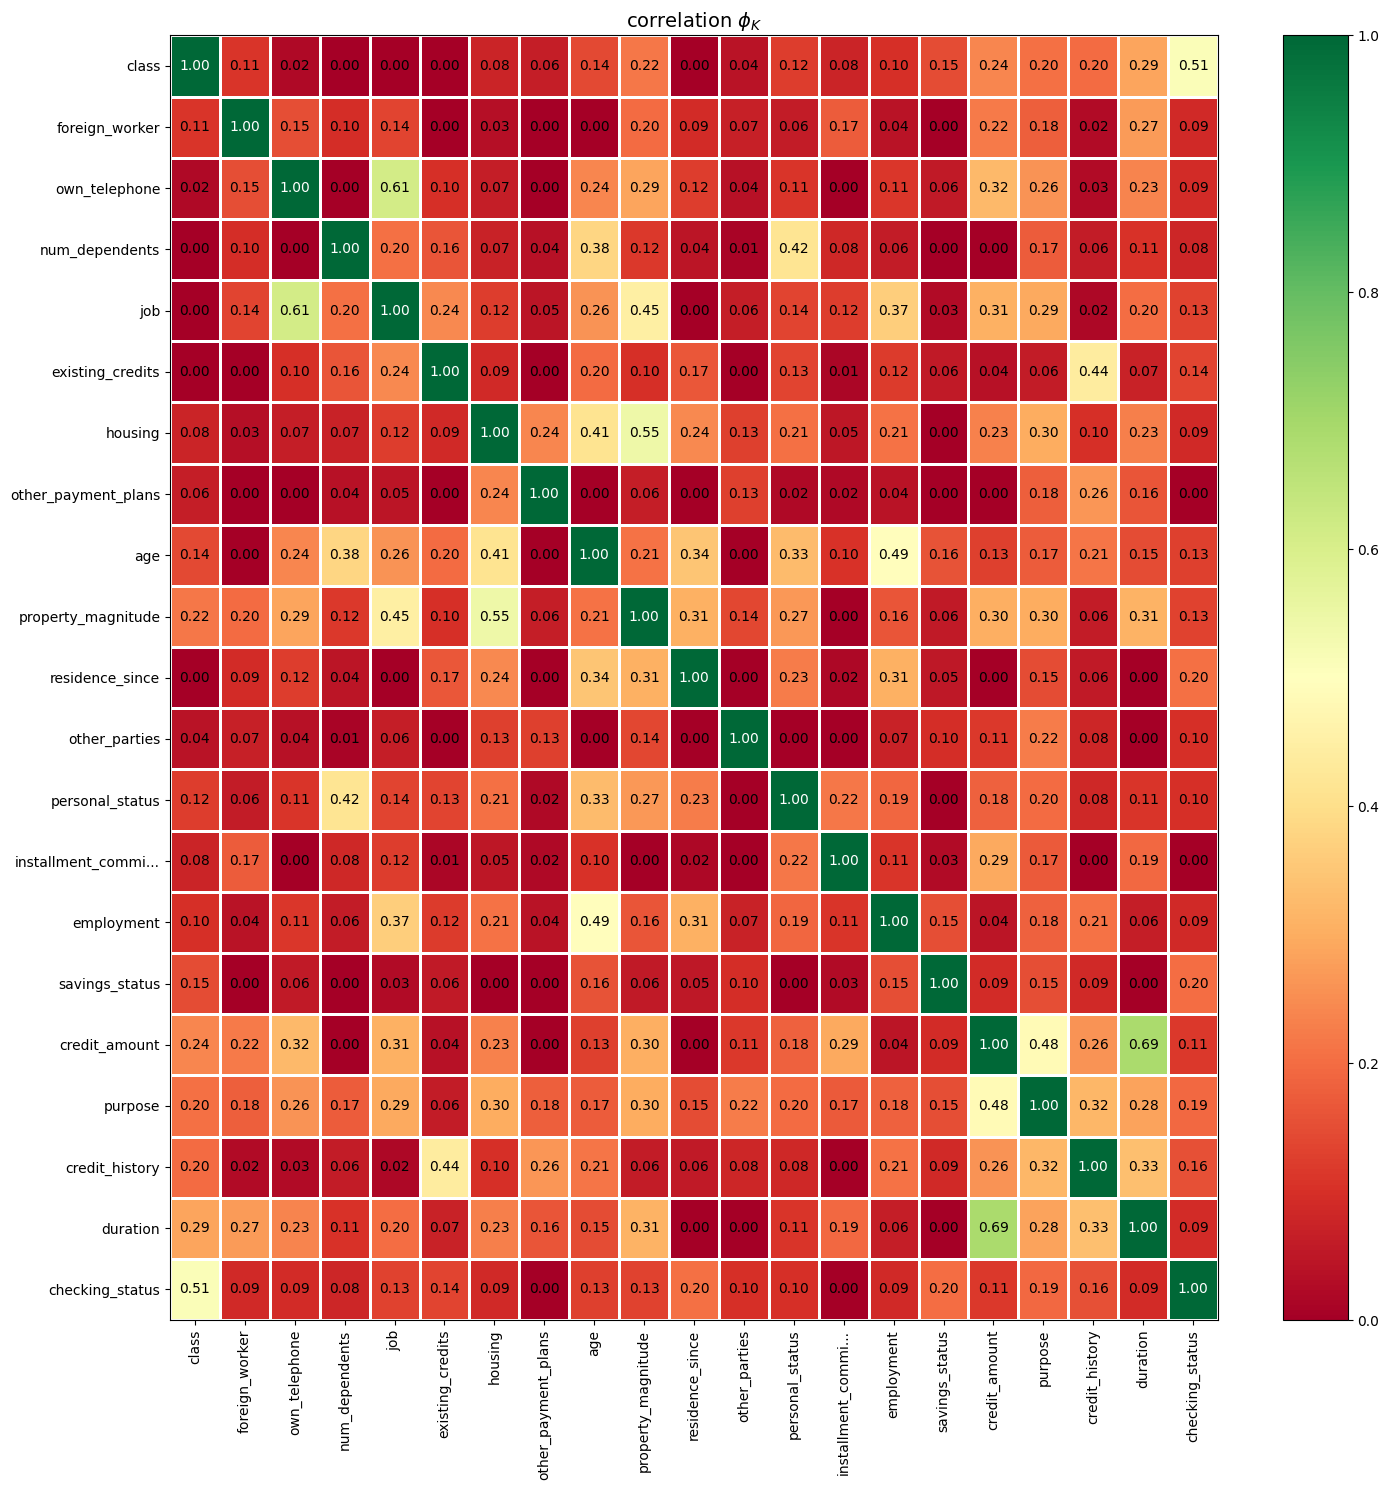

In [10]:
#приведем категориальные данные к необходимому виду, чтобы посмотреть матрицу корреляции(heatmap()), используем seaborn
#смотрим матрицу для того, чтобы проверить, насколько данные в столбцах, содержащих странные значения, связаны с другими данными
from phik.report import plot_correlation_matrix

df_factorized = df.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)
phik_overview = df_factorized.phik_matrix()
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, vmin=0,
                        title=r'correlation $\phi_K$',
                        figsize=(15, 15))

#опираясь на матрицу корреляции можно сделать вывод, что other_parties и other_payment_plans почти не связаны с другими данными,
#либо коэффициент корреляции слишком мал -> мы можем удалить эти столбцы, так как информация не является важной/полезной для нас

In [107]:
#смотрим, что значения none и no known savings/no checking status не определяются как null-значения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [108]:
#проверяем датасет на наличие дубликатов
df.duplicated().sum()

0

In [110]:
#смотрим частоту вхождения самых популярных значений для каждой колонки
#транспонируем матрицу для удобства представления
df.describe(include='object').T

,count,unique,top,freq
checking_status,1000,4,no checking,394
credit_history,1000,5,existing paid,530
purpose,1000,10,radio/tv,280
savings_status,1000,5,<100,603
employment,1000,5,1<=X<4,339
personal_status,1000,4,male single,548
other_parties,1000,3,none,907
property_magnitude,1000,4,car,332
other_payment_plans,1000,3,none,814
housing,1000,3,own,713


In [11]:
#мы убедиились, что в other_parties и other_payment_plans большинство значений - null, они не связаны с другими колонками, можем смело их удалять,
#т.к. они не содержат важной информации
df = df.drop(columns=['other_parties', 'other_payment_plans'])

In [12]:
#смотрим датасет, мы удалили две колонки
df.describe(include='object').T

,count,unique,top,freq
checking_status,1000,4,no checking,394
credit_history,1000,5,existing paid,530
purpose,1000,10,radio/tv,280
savings_status,1000,5,<100,603
employment,1000,5,1<=X<4,339
personal_status,1000,4,male single,548
property_magnitude,1000,4,car,332
housing,1000,3,own,713
job,1000,4,skilled,630
own_telephone,1000,2,none,596


<Axes: >

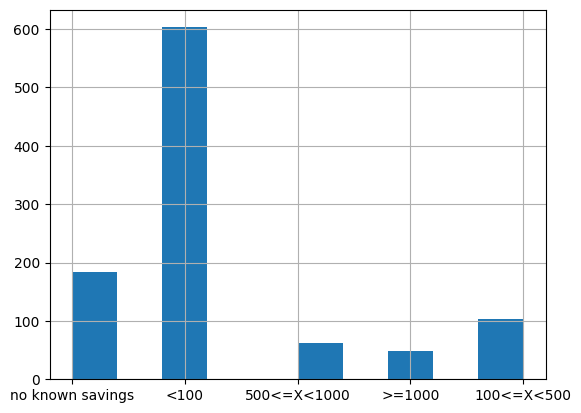

In [15]:
#в savings_status до сих пор много значений no known savings, нежелательно удалять ~200 строк, т.к. это существенная часть от выборки, 
#нужно заменить эти значения
df.savings_status.hist()

In [122]:
#опираясь на матрицу корреляции выявляем другие связанные с savings_status колонки, смотрим, где встречается no known savings
df[['checking_status', 'purpose', 'class', 'savings_status']][df.savings_status == 'no known savings']

,checking_status,purpose,class,savings_status
0,<0,radio/tv,good,no known savings
5,no checking,education,good,no known savings
16,no checking,radio/tv,good,no known savings
17,<0,business,good,no known savings
24,no checking,furniture/equipment,good,no known savings
...,...,...,...,...
968,no checking,radio/tv,good,no known savings
977,0<=X<200,business,good,no known savings
990,no checking,education,good,no known savings
992,<0,radio/tv,good,no known savings


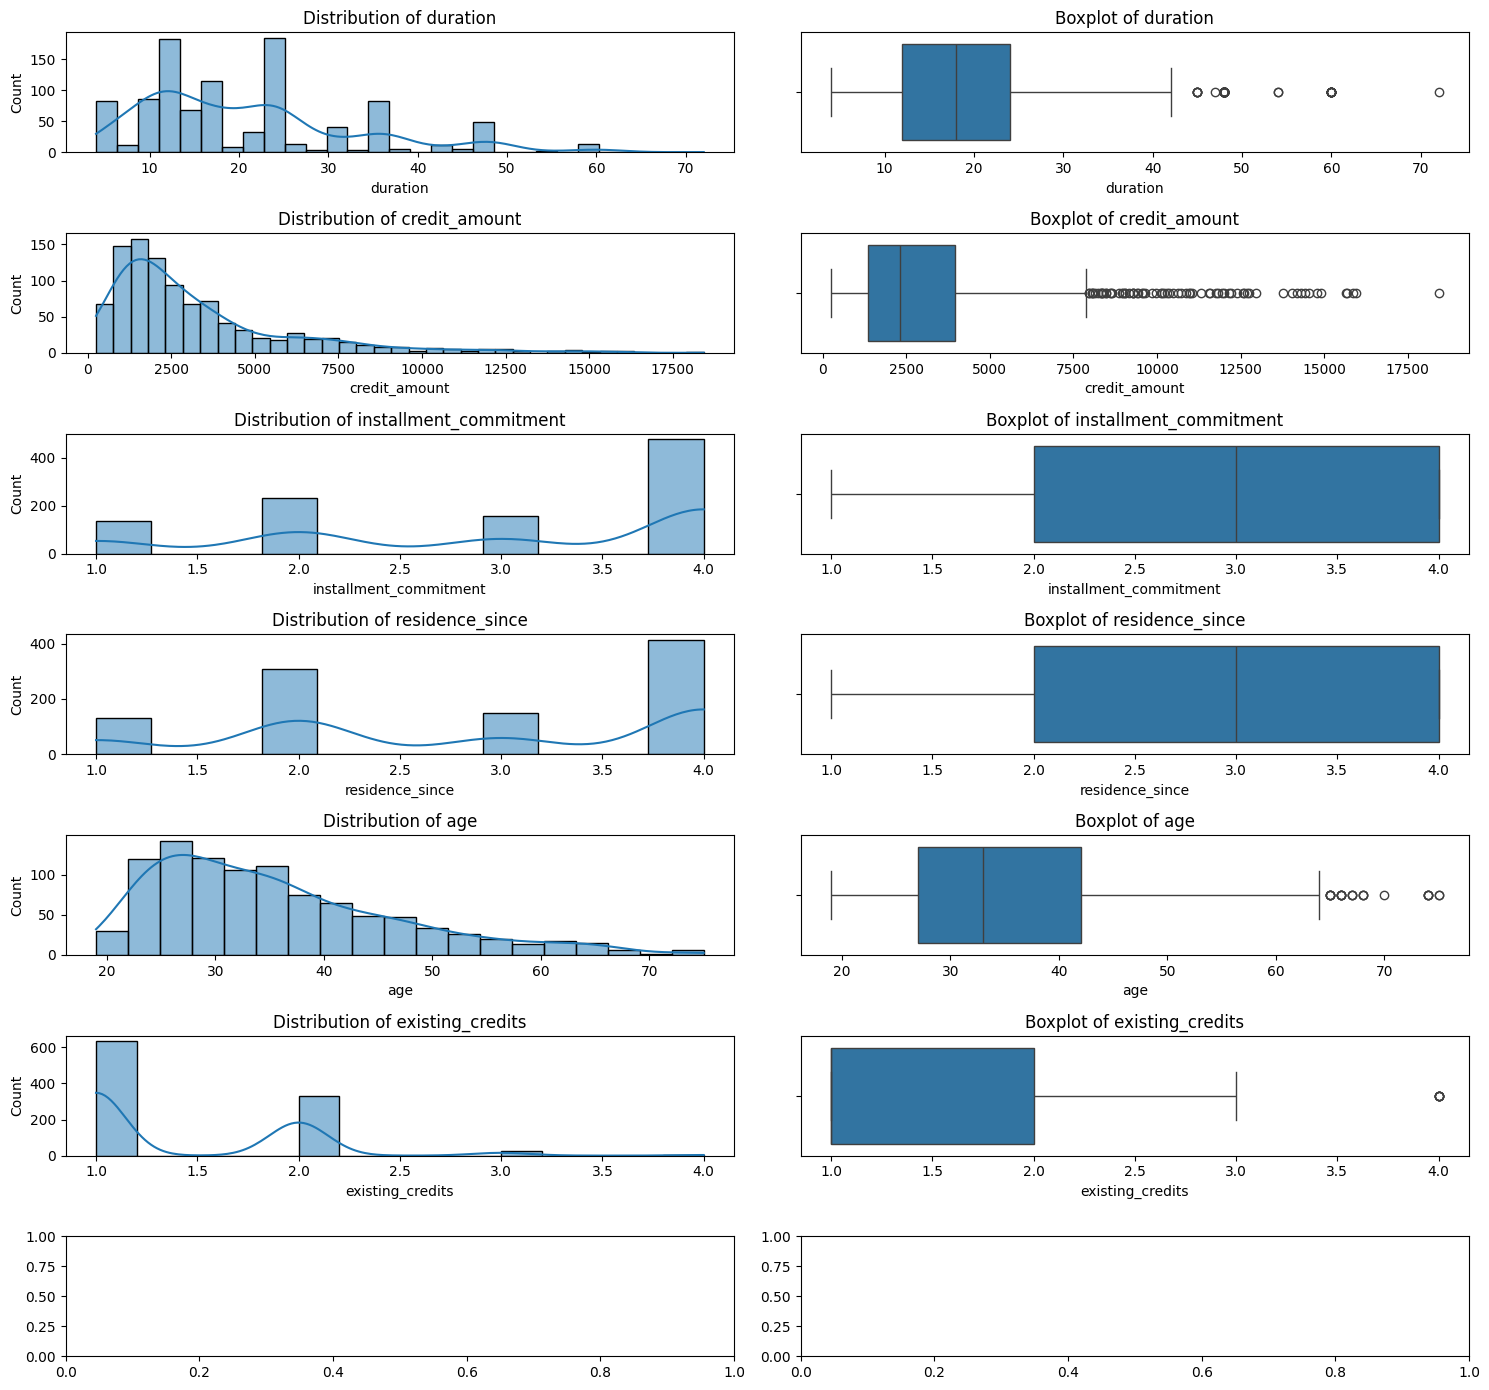

In [17]:
#смотрим зависимости этих колонок на графиках, видим существенные выбросы, которые нужно будет убрать

# Выбор только числовых столбцов из DataFrame
numeric_data = df.select_dtypes(exclude='object')

# Создание фигуры с подграфиками: количество строк соответствует числу числовых столбцов,
# в каждой строке два столбца подграфиков.
fig, axes = plt.subplots(nrows=len(numeric_data.columns), ncols=2,
                         figsize=(15, 2 * len(numeric_data.columns)))

# Проход по всем числовым столбцам, кроме последнего
for i, col in enumerate(numeric_data.columns[:-1]):
    # Гистограмма с наложением графика плотности для каждого столбца
    sns.histplot(data=numeric_data, x=col, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {col}')  # Установка заголовка для гистограммы

    # Boxplot для каждого столбца
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')  # Установка заголовка для boxplot

# Настройка размещения подграфиков, чтобы избежать перекрытия
plt.tight_layout()

# Отображение всех графиков
plt.show()

In [12]:
#учитывая то, что зависимость между данными действительно есть, создаем маску и для всех строк, где значения в соответствующих колонках совпадают, устанавливаем одинаковое значение savings_status
mask = df['savings_status'] == 'no known savings'

for index, row in df[mask].iterrows():
    # Найдем первую строку, где checking_status, class и purpose совпадают
    match = df[(df['checking_status'] == row['checking_status']) & 
               (df['class'] == row['class']) & 
               (df['purpose'] == row['purpose']) & 
               (df['savings_status'] != 'no known savings')]

    if not match.empty:
        # Заменим значение savings_status
        df.at[index, 'savings_status'] = match.iloc[0]['savings_status']

In [132]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,500<=X<1000,>=7,4.0,male single,4.0,real estate,67.0,own,2.0,skilled,1.0,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,2.0,real estate,22.0,own,1.0,skilled,1.0,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,3.0,real estate,49.0,own,1.0,unskilled resident,2.0,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,4.0,life insurance,45.0,for free,1.0,skilled,2.0,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,4.0,no known property,53.0,for free,2.0,skilled,2.0,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,4.0,real estate,31.0,own,1.0,unskilled resident,1.0,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,4.0,life insurance,40.0,own,1.0,high qualif/self emp/mgmt,1.0,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,4.0,car,38.0,own,1.0,skilled,1.0,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,4.0,no known property,23.0,for free,1.0,skilled,1.0,yes,bad


<Axes: >

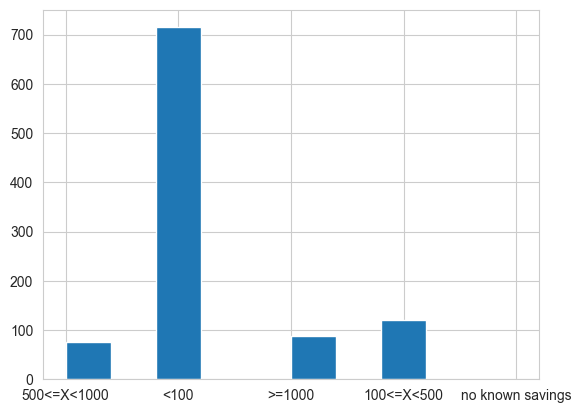

In [134]:
#после произведенных подстановок видим, что no known savings почти не осталось
df.savings_status.hist()

In [136]:
#no known savings осталась только одна запись, одной записью мы можем принебречь
df.savings_status.value_counts()

savings_status
<100                715
100<=X<500          121
>=1000               88
500<=X<1000          75
no known savings      1
Name: count, dtype: int64

In [18]:
#убираем все строку, где есть no known savings
df = df[df["savings_status"].str.contains("no known savings") == False]
df.savings_status.value_counts()

savings_status
<100           603
100<=X<500     103
500<=X<1000     63
>=1000          48
Name: count, dtype: int64

<Axes: >

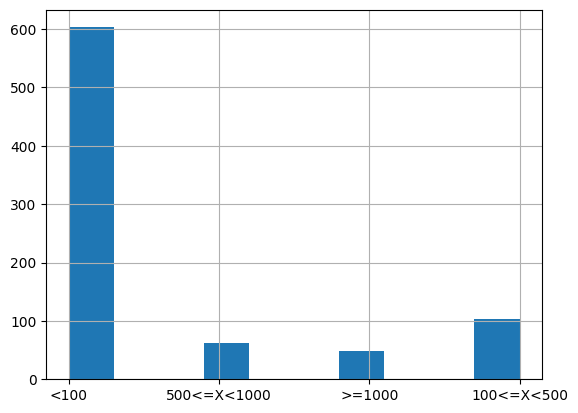

In [19]:
#мы заменили ненужные значения 
df.savings_status.hist()

In [21]:
#для приведения типов еще раз обратимся к сэмплу
#мы точно можем привести к INT64 значениям age, existing_credits, num_dependents и residence_since
df.sample(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
469,no checking,24.0,delayed previously,used car,4679.0,<100,4<=X<7,3.0,male single,3.0,car,35.0,own,2.0,unskilled resident,1.0,yes,yes,good
58,>=200,18.0,existing paid,new car,1961.0,<100,>=7,3.0,female div/dep/mar,2.0,car,23.0,own,1.0,high qualif/self emp/mgmt,1.0,none,yes,good
660,>=200,12.0,existing paid,radio/tv,1297.0,<100,1<=X<4,3.0,male mar/wid,4.0,real estate,23.0,rent,1.0,skilled,1.0,none,yes,good
777,<0,18.0,existing paid,radio/tv,3509.0,<100,4<=X<7,4.0,female div/dep/mar,1.0,real estate,25.0,own,1.0,skilled,1.0,none,yes,good
643,no checking,24.0,critical/other existing credit,radio/tv,1851.0,<100,4<=X<7,4.0,male mar/wid,2.0,car,33.0,own,2.0,skilled,1.0,yes,yes,good
522,<0,48.0,no credits/all paid,furniture/equipment,7119.0,<100,1<=X<4,3.0,male single,4.0,no known property,53.0,for free,2.0,skilled,2.0,none,yes,bad
148,<0,36.0,critical/other existing credit,furniture/equipment,5371.0,<100,1<=X<4,3.0,male single,2.0,life insurance,28.0,own,2.0,skilled,1.0,none,yes,good
207,0<=X<200,12.0,critical/other existing credit,domestic appliance,1424.0,<100,4<=X<7,4.0,male single,3.0,life insurance,26.0,own,1.0,skilled,1.0,none,yes,good
552,<0,48.0,existing paid,radio/tv,6999.0,<100,4<=X<7,1.0,male mar/wid,1.0,real estate,34.0,own,2.0,skilled,1.0,yes,yes,bad
391,0<=X<200,12.0,existing paid,furniture/equipment,983.0,>=1000,<1,1.0,female div/dep/mar,4.0,real estate,19.0,rent,1.0,unskilled resident,1.0,none,yes,good


In [22]:
#приводим к INT64
df['age'] = df['age'].astype('int64')
df['existing_credits'] = df['existing_credits'].astype('int64')
df['num_dependents'] = df['num_dependents'].astype('int64')
df['residence_since'] = df['residence_since'].astype('int64')

In [26]:
#теперь мусорные данные убраны, нужные колонки приведены к подходящему типу
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 1 to 999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         817 non-null    object 
 1   duration                817 non-null    float64
 2   credit_history          817 non-null    object 
 3   purpose                 817 non-null    object 
 4   credit_amount           817 non-null    float64
 5   savings_status          817 non-null    object 
 6   employment              817 non-null    object 
 7   installment_commitment  817 non-null    float64
 8   personal_status         817 non-null    object 
 9   residence_since         817 non-null    int64  
 10  property_magnitude      817 non-null    object 
 11  age                     817 non-null    int64  
 12  housing                 817 non-null    object 
 13  existing_credits        817 non-null    int64  
 14  job                     817 non-null    object 